## MOwNiT Laboratorium 8 Kwadraury

In [4]:
using QuadGK
using Polynomials
using Plots

### Zadanie 1
Korzytając z pakietu Polynomials zaimplentuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1).
- sprawdź(np. za pomocą fukcji roots z pakietu Polynomials), że ich zera sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [2]:
p(i) = 
    if i==0 
        #x->1
        Poly([1])
    elseif i==1 
        #x->x
        Poly([0,1])
    else
        #x->(2*i-1)/i*x*p(i-1)(x) - (i-1)/i*p(i-2)(x)
        (2*i-1)/i*Poly([0,1])*p(i-1) - (i-1)/i*p(i-2)
    end

p (generic function with 1 method)

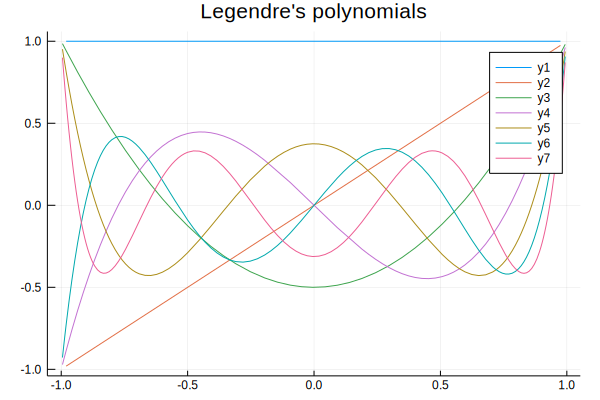

In [270]:
plot(x->p(0)(x),-1,1)
plot!(x->p(1)(x),-1,1)
plot!(x->p(2)(x),-1,1)
plot!(x->p(3)(x),-1,1)
plot!(x->p(4)(x),-1,1)
plot!(x->p(5)(x),-1,1)
plot!(x->p(6)(x),-1,1,title = "Legendre's polynomials")

In [56]:
hcat(
    vcat(sort(roots(p(2))),sort(roots(p(3))),sort(roots(p(4)))),
    vcat(gauss(Float64,2)[1],gauss(Float64,3)[1],gauss(Float64,4)[1])
)

9×2 Array{Float64,2}:
 -0.57735   -0.57735 
  0.57735    0.57735 
 -0.774597  -0.774597
  0.0        0.0     
  0.774597   0.774597
 -0.861136  -0.861136
 -0.339981  -0.339981
  0.339981   0.339981
  0.861136   0.861136

### Zadanie 2
- napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$ policzy $\int_{-1}^{1} f dx$ metodą używającą funkcji: 
$gauss(k) $
oraz sumy
$sum(a .* f.(xp))$
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna,
- podaj związek z twierdzeniem o stopniu dokładności kwadratury Gaussa

In [126]:
function integral(f,k)
    (xp,a)=gauss(Float64,k)
    sum(a .* f.(xp))   
end

integral (generic function with 2 methods)

In [148]:
f(x) = 12.1x^20 - 16x^19 +15x^18 - 2x^17 + 19x^16 - 37*x^15 + 2x^14 - 17x^13 + 3x^12 + 
5x^11 + 12x^10 - 16x^9 +15x^8 - 2x^7 + 19x^6 - 37*x^5 + 2x^4 - 17x^3 + 3x^2 + 5x + 57

f (generic function with 1 method)

In [130]:
gauusIntegrals = [integral(f,d) for d in 1:20]

20-element Array{Float64,1}:
 114.0             
 118.33877288353737
 125.37836861439999
 130.1185139435939 
 132.2535500892144 
 133.10284183442332
 133.36890683931023
 133.4287667122977 
 133.43770638136638
 133.43851511073413
 133.43855051037715
 133.43855051037715
 133.43855051037713
 133.4385505103772 
 133.43855051037713
 133.43855051037715
 133.43855051037713
 133.43855051037715
 133.43855051037718
 133.43855051037718

In [131]:
quadgkIntegral = quadgk(f, -1, 1)[1]

133.43855051037715

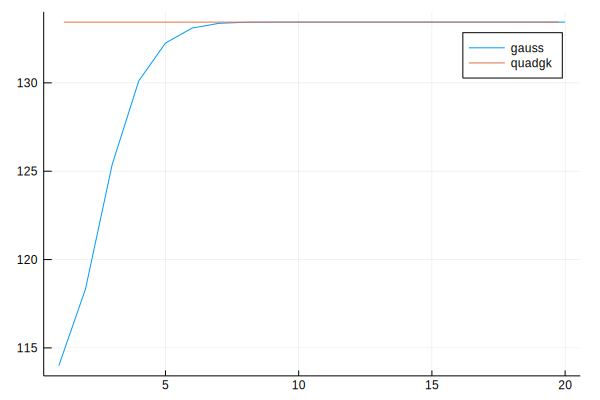

In [274]:
plot(1:20,gauusIntegrals,label="gauss")
plot!(x->quadgkIntegral,1,20,label="quadgk")


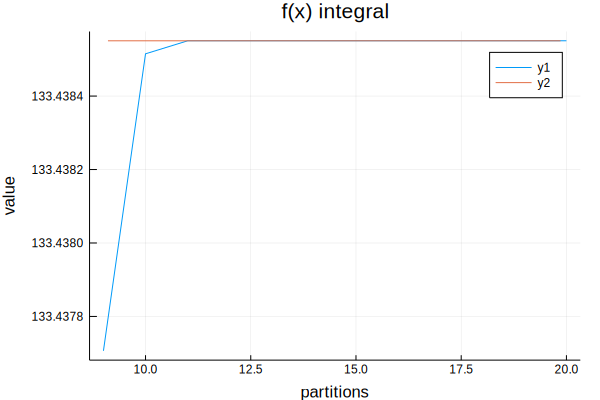

In [276]:
plot(9:20,gauusIntegrals[9:20])
plot!(x->quadgkIntegral,9,20,title = "f(x) integral",xlabel="partitions",ylabel="value")

#### Twierdzenie o stopniu dokładności kwadratury Gaussa
Kwadratura ma stopień dokładności 2n − 1; tzn. jest dokładna dla
wielomianu: $P(x) = Q(x) · ϕn(x) + R(x)$ ; $Q$, $R$ są stopnia $<n$.

Czyli dla wielomianu 20 stopnia wystarczy stopień kwadratury 11

### Zadanie 3
Skorzystaj z rozwiązania zadania 2 do napisania funkcji liczącej całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$

dokonując normalizacji do $\int_{-1}^{1} F(z) dz$

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.

In [142]:
function integral(f,k,a,b)
    F(z) = f((b+a)/2 + z*(b-a)/2)
    integral(F,k)*(b-a)/2
end

integral (generic function with 2 methods)

In [152]:
hcat(
    [integral(f,d) for d in 1:20],
    [integral(f,d,-1,1) for d in 1:20]
)

20×2 Array{Float64,2}:
 114.0    114.0  
 118.339  118.339
 125.378  125.378
 130.119  130.119
 132.254  132.254
 133.103  133.103
 133.369  133.369
 133.429  133.429
 133.438  133.438
 133.439  133.439
 133.439  133.439
 133.439  133.439
 133.439  133.439
 133.439  133.439
 133.439  133.439
 133.439  133.439
 133.439  133.439
 133.439  133.439
 133.439  133.439
 133.439  133.439

In [196]:
f(x) = x^3

f (generic function with 1 method)

In [157]:
integral(f,3,-5,5)

0.0

In [164]:
integral(f,3,0,2)

4.0

In [163]:
quadgk(f, 0, 2)[1]

4.0

### Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja guadgk używająca całkowania Gauss-Kronroda

Funkcja ta ma możliwość liczenia również całek do nieskończoności Policz całkę od minus do plus nieskonczonosci standardowego rozkładu normalnego Gaussa $ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [168]:
g(x) = 1/sqrt(2*pi)*exp((-x^2)/2)

g (generic function with 1 method)

In [171]:
quadgk(g, -Inf, Inf)[1]

1.0000000000032583

### Zadanie 5
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu w stosunku do wyniku otrzymanego analitycznie w zaleznosci od ilosci potrzebnych przedziałów dla przykładowego wielomianu.

In [5]:
function myIntegral1(f,k,a,b)
    nodes = collect(a:(b-a)/k:b)
    sum = 0
    for i in 1:k
        sum += (f(nodes[i])+f(nodes[i+1]))/2*(b-a)/k
    end
    sum
end

myIntegral1 (generic function with 1 method)

In [14]:
function myIntegral2(f,k,a,b)
    nodes = collect(a:(b-a)/k:b)
    (f(nodes[1])/2 + sum(n -> f(n),nodes[2:k]) + f(nodes[k+1])/2)*(b-a)/k
end

myIntegral2 (generic function with 1 method)

In [76]:
f(x) = x^2
F(x) = x^3/3

F (generic function with 1 method)

In [77]:
F5(i) = F(3)-F(-3)
F6(i) = myIntegral1(f,i,-3,3)

F6 (generic function with 2 methods)

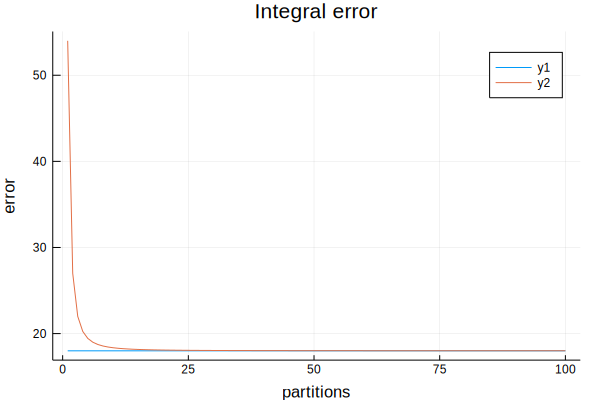

In [78]:
plot([F5,F6],collect(1:100),title = "Integral error",xlabel="partitions",ylabel="error")

In [82]:
f(x) = 2x^4 - 17x^3 + 3x^2 - 5x + 57
F(x) = 2/5*x^5 - 14/4*x^4  + x^3 - 5/2*x^2 + 57x

F (generic function with 1 method)

In [83]:
F5(i) = F(3)-F(-3)
F6(i) = myIntegral1(f,i,-3,3)

F6 (generic function with 2 methods)

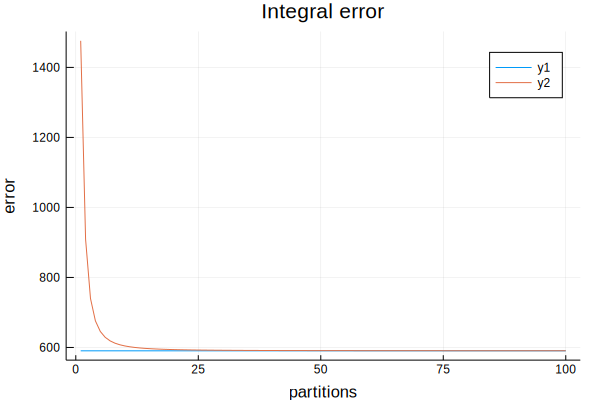

In [84]:
plot([F5,F6],collect(1:100),title = "Integral error",xlabel="partitions",ylabel="error")